# Atividade 4
## Grupo 3

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_excel('2025 2ºsem M109 Cell Phone Dependence Scale-3.xlsx')
df.columns = df.columns.str.strip()
df.head()

,ID,Sexo:,Idade (anos):,Peso (kg):,Altura (m):,IMC,Coluna1,Curso:,Período:,Turno de estudo:,...,13- Com que frequência você se mantém conectado ao celular quando está com amigos ou família?,Pontos 13,14- Com que frequência você se sente sozinho se não participa de redes sociais ou quando não está em grupo enquanto outros estão?,Pontos 14,15- Quantas vezes você mantém na agenda do celular o número de um médico. psicólogo ou hospital por medo de se sentir mal na rua?,Pontos 15,16- Com que frequência você toca no celular?,Pontos 16,Pontuação final,Classificação
0,5,Masculino,20,85,1.82,25.661152,25.661152,Engenharia de Computação,P6,Integral,...,Nunca / Raramente,0,Nunca / Raramente,0,Nunca / Raramente,0,Frequentemente,1,5,Sobrepeso
1,6,Masculino,19,64,1.90,17.728532,17.728532,Engenharia de Telecomunicações,P5,Integral,...,Nunca / Raramente,0,Nunca / Raramente,0,Nunca / Raramente,0,Frequentemente,1,10,Abaixo do peso
2,12,Feminino,29,75,1.69,26.259585,26.259585,Engenharia de Telecomunicações,P6,Noturno,...,Sempre,2,Sempre,2,Frequentemente,1,Sempre,2,29,Sobrepeso
3,13,Masculino,21,68,1.80,20.987654,20.987654,Engenharia de Computação,P6,Noturno,...,Frequentemente,1,Frequentemente,1,Nunca / Raramente,0,Sempre,2,23,Peso Normal
4,26,Masculino,20,64,1.69,22.408179,22.408179,Engenharia de Software,P5,Integral,...,Frequentemente,1,Nunca / Raramente,0,Nunca / Raramente,0,Sempre,2,16,Peso Normal


In [10]:
# Criar dataframe filtrado apenas com alunos dos períodos P5 e P6
df_silver = df[df['Período:'].isin(['P5', 'P6'])].copy()
df_selected = df_silver[["Idade (anos):", "Peso (kg):", "Pontuação final"]].copy()

df_selected.head()

,Idade (anos):,Peso (kg):,Pontuação final
0,20,85,5
1,19,64,10
2,29,75,29
3,21,68,23
4,20,64,16


### 1) Calcular as medidas de tendência central e variabilidade, vistos em sala de aula;

In [11]:
# Função para calcular medidas estatísticas
def resumo_estatistico(serie):
    serie = serie.dropna()  # remove valores ausentes
    media = serie.mean()
    mediana = serie.median()
    moda = serie.mode()[0] if not serie.mode().empty else np.nan
    variancia = serie.var(ddof=1)
    desvio_padrao = serie.std(ddof=1)
    amplitude = serie.max() - serie.min()
    coef_var = (desvio_padrao / media) * 100
    return {
        "Média": round(media, 2),
        "Mediana": round(mediana, 2),
        "Moda": moda,
        "Variância": round(variancia, 2),
        "Desvio Padrão": round(desvio_padrao, 2),
        "Amplitude": round(amplitude, 2),
        "Coef. Variação (%)": round(coef_var, 2)
    }

resultados = {col: resumo_estatistico(df_selected[col]) for col in df_selected.columns}
tabela_resumo = pd.DataFrame(resultados)
tabela_resumo.to_excel("q1.xlsx")
tabela_resumo.head()

,Idade (anos):,Peso (kg):,Pontuação final
Média,21.18,72.67,16.29
Mediana,20.00,70.00,16.00
Moda,20.00,64.00,16.00
Variância,10.83,228.68,33.62
Desvio Padrão,3.29,15.12,5.80


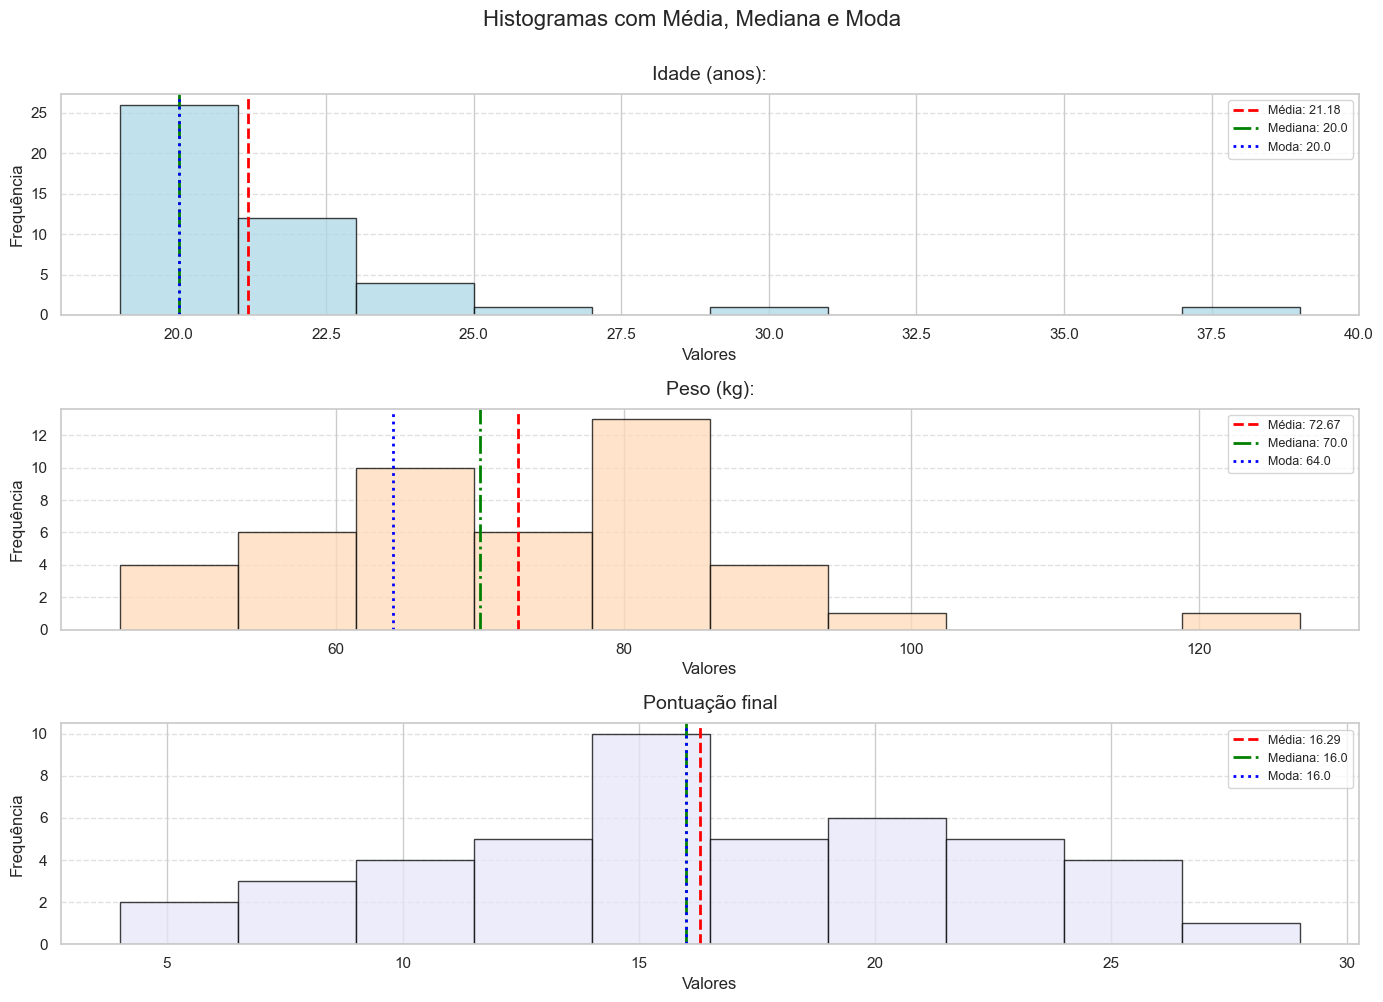

In [29]:
variaveis = {
    "Idade (anos):": df_selected["Idade (anos):"],
    "Peso (kg):": df_selected["Peso (kg):"],
    "Pontuação final": df_selected["Pontuação final"]
}

fig, axes = plt.subplots(3, 1, figsize=(14, 10))
cores = ["#ADD8E6", "#FFDAB9", "#E6E6FA"]

for i, (col, data) in enumerate(variaveis.items()):
    ax = axes[i]
    ax.hist(data, bins=10, color=cores[i], edgecolor='black', alpha=0.75)
    
    # Linhas verticais de média, mediana e moda
    media = tabela_resumo.loc["Média", col]
    mediana = tabela_resumo.loc["Mediana", col]
    moda = tabela_resumo.loc["Moda", col]
    
    ax.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Média: {media}')
    ax.axvline(mediana, color='green', linestyle='-.', linewidth=2, label=f'Mediana: {mediana}')
    ax.axvline(moda, color='blue', linestyle=':', linewidth=2, label=f'Moda: {moda}')
    
    # Títulos e rótulos
    ax.set_title(col, fontsize=14, pad=10)
    ax.set_xlabel("Valores")
    ax.set_ylabel("Frequência")
    ax.legend(fontsize=9, loc='upper right')
    ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.suptitle("Histogramas com Média, Mediana e Moda", fontsize=16, y=1.0)
plt.tight_layout()
plt.savefig('hitogramas_com_media_mediana_moda.png')
plt.show()

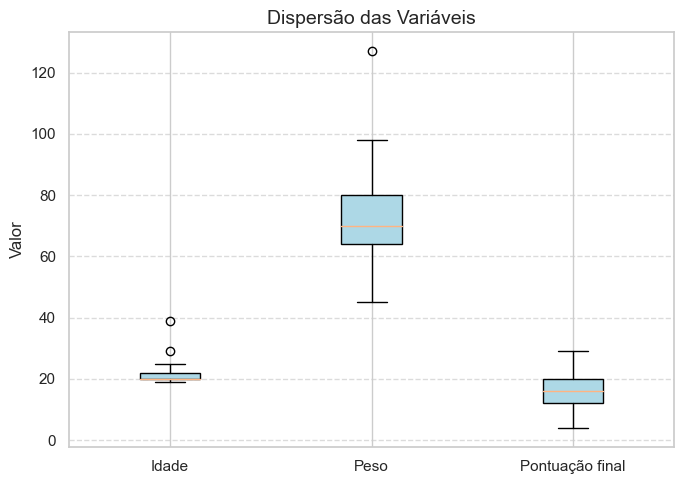

In [27]:
plt.figure(figsize=(7,5))
plt.boxplot([df["Idade (anos):"], df["Peso (kg):"], df["Pontuação final"]],
            labels=["Idade", "Peso", "Pontuação final"],
            patch_artist=True,
            boxprops=dict(facecolor="#ADD8E6"))
plt.title("Dispersão das Variáveis", fontsize=14)
plt.ylabel("Valor")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('dispersao_das_variaveis.png')
plt.show()

### 2) Comparar os coeficientes de variação das variáveis: 
Idade x Pontuação final (mesmos alunos)

Peso x Pontuação final (mesmos alunos)

Coeficientes de Variação:
                 Coef. Variação (%)
Idade (anos)                  15.54
Peso (kg)                     20.81
Pontuação final               35.60

Comparações solicitadas:
Idade × Pontuação final: 15.54% vs 35.60%
→ A variável Pontuação final apresenta maior dispersão relativa que a Idade.

Peso × Pontuação final: 20.81% vs 35.60%
→ A variável Pontuação final apresenta maior dispersão relativa que o Peso.


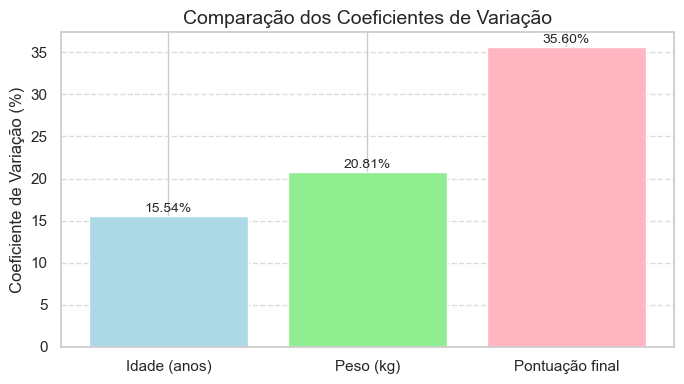

In [28]:
# Extrair os coeficientes de variação diretamente da tabela_resumo
cv_idade = tabela_resumo.loc["Coef. Variação (%)", "Idade (anos):"]
cv_peso = tabela_resumo.loc["Coef. Variação (%)", "Peso (kg):"]
cv_pontuacao = tabela_resumo.loc["Coef. Variação (%)", "Pontuação final"]

# Exibir resultados em tabela
cv_comparacao = pd.DataFrame({
    "Coef. Variação (%)": [cv_idade, cv_peso, cv_pontuacao]
}, index=["Idade (anos)", "Peso (kg)", "Pontuação final"])

print("Coeficientes de Variação:")
print(cv_comparacao)

# --- Comparações específicas ---
print("\nComparações solicitadas:")

print(f"Idade × Pontuação final: {cv_idade:.2f}% vs {cv_pontuacao:.2f}%")
if cv_idade > cv_pontuacao:
    print("→ A variável Idade apresenta maior dispersão relativa que a Pontuação final.")
else:
    print("→ A variável Pontuação final apresenta maior dispersão relativa que a Idade.")

print(f"\nPeso × Pontuação final: {cv_peso:.2f}% vs {cv_pontuacao:.2f}%")
if cv_peso > cv_pontuacao:
    print("→ A variável Peso apresenta maior dispersão relativa que a Pontuação final.")
else:
    print("→ A variável Pontuação final apresenta maior dispersão relativa que o Peso.")


# --- Gráfico comparativo dos coeficientes de variação ---
plt.figure(figsize=(7,4))
plt.bar(cv_comparacao.index, cv_comparacao["Coef. Variação (%)"], color=["#ADD8E6", "#90EE90", "#FFB6C1"])
plt.title("Comparação dos Coeficientes de Variação", fontsize=14)
plt.ylabel("Coeficiente de Variação (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(cv_comparacao["Coef. Variação (%)"]):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=10)
plt.tight_layout()
plt.savefig('comparacao_coeficientes_variacao.png')
plt.show()
